# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [39]:
# url_test = "http://api.openweathermap.org/data/2.5/weather?"
# city="London"
# units = "imperial"

# query_url_test = f"{url_test}appid={weather_api_key}&units={units}&q={city}"

# testing = requests.get(query_url_test)
# testing_json=testing.json()
# testing_json
response

{'cod': '404', 'message': 'city not found'}

In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q=" 


cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

for city in cities:
#     try:
        response = requests.get(query_url + city).json()
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
            if response = "404":
                then 
#     except response.NotFoundError: 
        print('value not found')


AttributeError: 'dict' object has no attribute 'NotFoundError'

In [17]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).
url_test = "http://api.openweathermap.org/data/2.5/weather?"
city="London"
units = "imperial"

query_url_test = f"{url_test}appid={weather_api_key}&units={units}&q="



# cities =  ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taiwan"]

cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

for city in cities:
#     try:
        response = requests.get(query_url+city).json()
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
#     except(KeyError, IndexError): 
#         
    
print(max_temp)

[61, 61, 46.99, 66.99, 89.6, 84.2, 60.01, 42.01, 66.99, 82]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [141]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Paris,11,FR,1570571885,87,48.86,2.35,55.40,8.05
1,London,0,GB,1570572214,76,51.51,-0.13,53.60,10.29
2,Oslo,90,NO,1570572128,100,59.91,10.74,41.00,4.70
3,Beijing,0,CN,1570572061,93,39.91,116.39,57.99,2.24
4,Mumbai,75,IN,1570572140,83,19.01,72.85,86.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

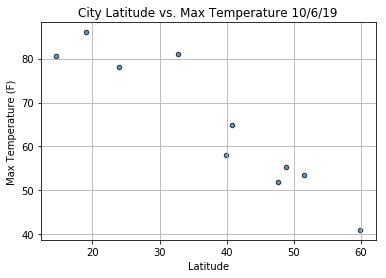

In [142]:
# create scatter plot for lat vs. max temp
weather_data.plot(x="Lat", y="Max Temp", kind="scatter", marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("City Latitude vs. Max Temperature 10/6/19")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(axis = 'both')
plt.show()
plt.savefig("lat_vs_maxtemp")

#### Latitude vs. Humidity Plot

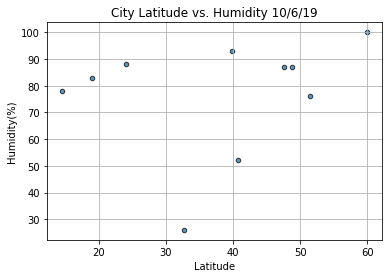

<Figure size 432x288 with 0 Axes>

In [143]:
# create scatter plot for lat vs. humidity
weather_data.plot(x="Lat", y="Humidity", kind="scatter", marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("City Latitude vs. Humidity 10/6/19")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid(axis = 'both')
plt.show()
plt.savefig("lat_vs_humidity")

#### Latitude vs. Cloudiness Plot

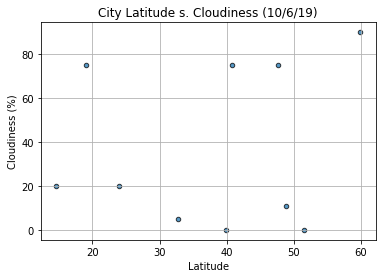

<Figure size 432x288 with 0 Axes>

In [144]:
# create scatter plot for lat vs. cloudiness
weather_data.plot(x="Lat", y="Cloudiness", kind="scatter", marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("City Latitude s. Cloudiness (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(axis = 'both')
plt.show()
plt.savefig("lat_vs_cloudiness")

#### Latitude vs. Wind Speed Plot

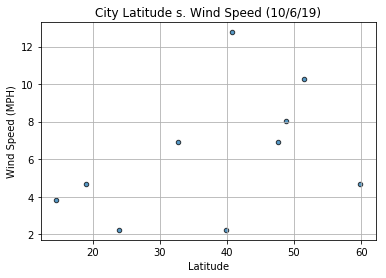

<Figure size 432x288 with 0 Axes>

In [145]:
# create scatter plot for lat vs. wind speed
weather_data.plot(x="Lat", y="Wind Speed", kind="scatter", marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("City Latitude s. Wind Speed (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(axis = 'both')
plt.show()
plt.savefig("lat_vs_windSpeed")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [148]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_data.loc[(weather_data["Lat"]>=0)]
south_hemi = weather_data.loc[(weather_data["Lat"]<0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

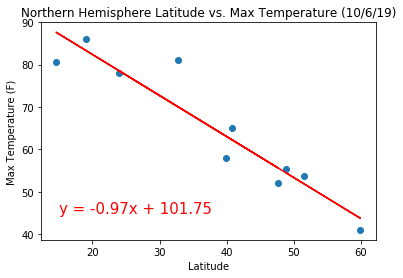

The r-squared value is: -0.9429685318355204


'y = -0.97x + 101.75'

<Figure size 432x288 with 0 Axes>

In [152]:
# determine x- and y-values
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=15,color="red")

# identify plot labels
plt.title("Northern Hemisphere Latitude vs. Max Temperature (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

print(f"The r-squared value is: {rvalue}")
plt.savefig("NH_lat_vs_maxtemp")
line_eq

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [153]:
# determine x- and y-values
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=15,color="red")

# identify plot labels
plt.title("Southern Hemisphere Latitude vs. Max Temperature (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# plt.xlim(-0.25, len(south_hemi["Lat"]))

print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig("SH_lat_vs_maxtemp")

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.21301863047964215


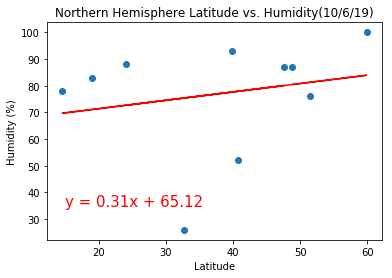

<Figure size 432x288 with 0 Axes>

In [155]:
# determine x- and y-values
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,35),fontsize=15,color="red")

# identify plot labels
plt.title("Northern Hemisphere Latitude vs. Humidity(10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig("NH_lat_vs_humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [156]:
# determine x- and y-values
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,35),fontsize=15,color="red")

# identify plot labels
plt.title("Southern Hemisphere Latitude vs. Humidity (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig("SH_lat_vs_humidity")

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.17340711932617822


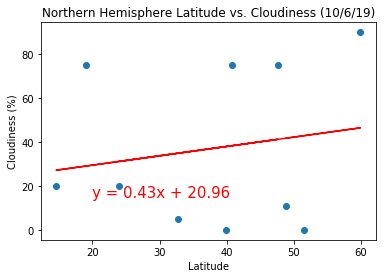

<Figure size 432x288 with 0 Axes>

In [159]:
# determine x- and y-values
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# identify plot labels
plt.title("Northern Hemisphere Latitude vs. Cloudiness (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig("NH_lat_vs_cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [160]:
# determine x- and y-values
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# identify plot labels
plt.title("Southern Hemisphere Latitude vs. Cloudiness (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig("SH_lat_vs_cloud")

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.42338956827322294


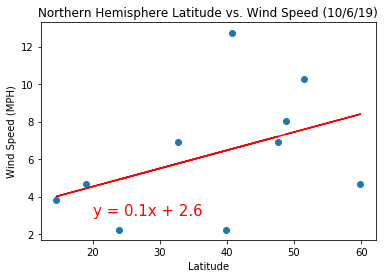

<Figure size 432x288 with 0 Axes>

In [162]:
# determine x- and y-values
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,3),fontsize=15,color="red")

# identify plot labels
plt.title("Northern Hemisphere Latitude vs. Wind Speed (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')


print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig("NH_lat_vs_WS")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [163]:
# determine x- and y-values
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,3),fontsize=15,color="red")

# identify plot labels
plt.title("Southern Hemisphere Latitude vs. Wind Speed (10/6/19)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')


print(f"The r-squared value is: {rvalue}")
plt.show()
plt.savefig("SH_lat_vs_WS")

ValueError: Inputs must not be empty.